# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [1]:
# Look to uploaded piece of paper for answers to Q1.1, 1.2, and 1.3. Picture titled Q1.1-1.3.jpg

# Q1.4
# The non-decreasing transformation of a mean is the median of the transformed variable. The median point
# in a set will always remain higher than half the points and lower than half the points in a non-decreasing
# transformation, for example, like if one squared all points, then the median point from 0-10 (5), would
# remain the median point. This applies to the quantiles as well, as they are the same idea as the median,
# simply just points at other places in the graph. On the other hand, the IQR and range may not be the same
# after a transformation as the distance between each point could change, so in the squaring example, the 
# distance between 0 and 10 is 0 initially but becomes 100 after squaring, so the range changes. The 
# IQR also changes in the same way with the quartiles' distances changing.

# Q1.5
# There are some non-decreasing transformations g() where m(g(x)) != g(m(x)). For example, if g() 
# is a non-linear transformation. Say, if g() is an exponential or a logarithmic transformation,
# then m(g(x)) != g(m(x)). If g() is linear though, then it is true.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
import pandas as pd
import numpy as np

# Q2.1 and 2.2
df = pd.read_csv('/Users/edwardzhang/Documents/college/4th year sem 1/Machine Learning/eda_assignment/data/airbnb_hw.csv')
df.head()
# 30478 rows by 13 columns
# Variables: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode
# Beds, Number of Records, Number of Reviews, price Review Scores Rating
# Observations Count: 30478

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# Q2.3
pd.crosstab(df["Room Type"], df["Property Type"])
# Apartments, Houses, Lofts, and Townhouses are the most common types available.
# For bed and breakfasts, houses, and other, it is more common to have a private room.

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: >

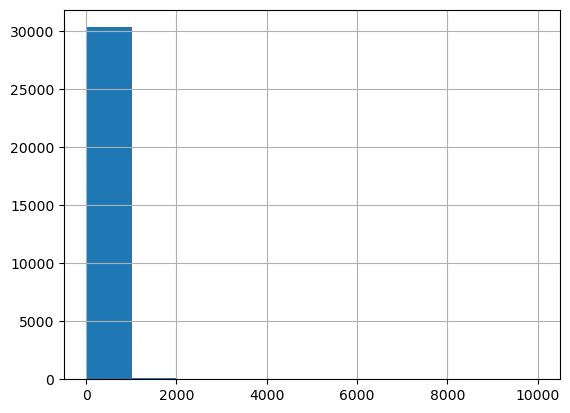

In [4]:
# Q2.4
df["Price"].unique()
df["Price"]=df["Price"].str.replace(",","")
df["Price"]=pd.to_numeric(df["Price"]) 
df["Price"].hist()

<Axes: ylabel='Density'>

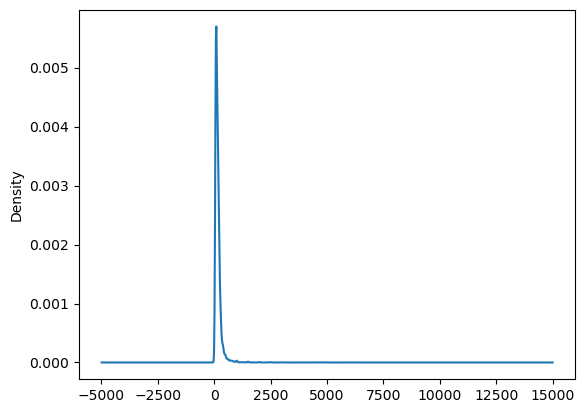

In [7]:
df["Price"].plot.density()

<Axes: >

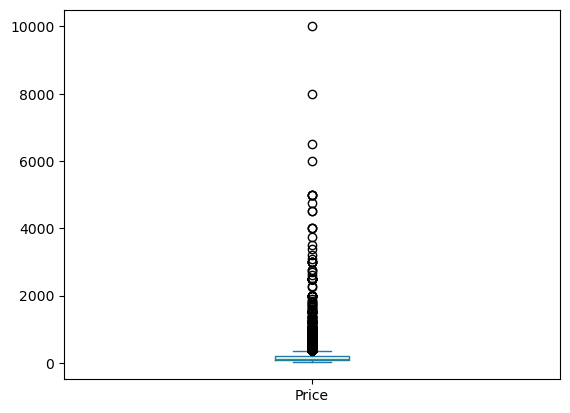

In [11]:
df["Price"].plot.box()

In [8]:
df["Price"].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: >

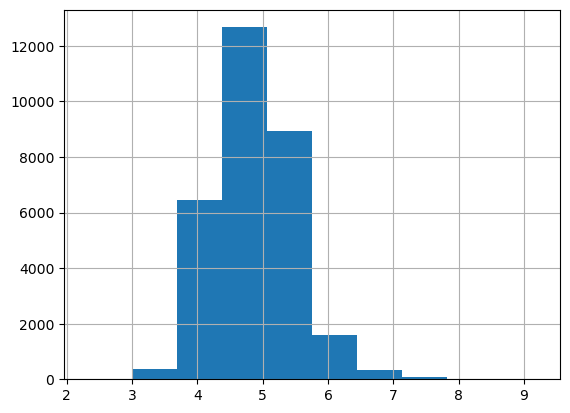

In [13]:
# The Data is poorly scaled, incredibly right skewed. There are many, many outliers on the right side.

price_log = np.log(df["Price"])
price_log.hist()

<Axes: ylabel='Density'>

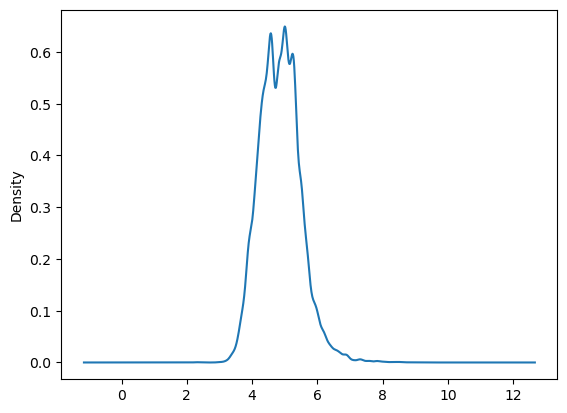

In [14]:
price_log.plot.density()

<Axes: >

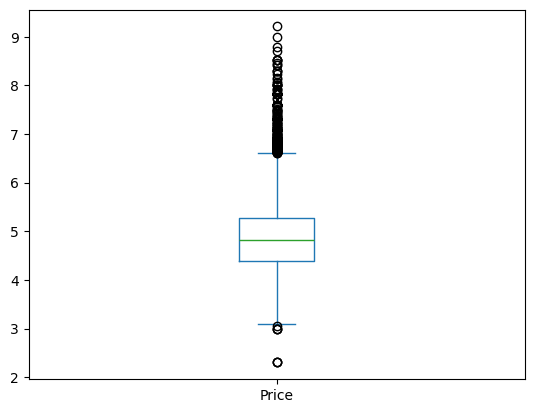

In [15]:
price_log.plot.box()

In [17]:
price_log.describe()

# Things look better after the log transformation.
# Outliers still exist, though.

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Beds'>

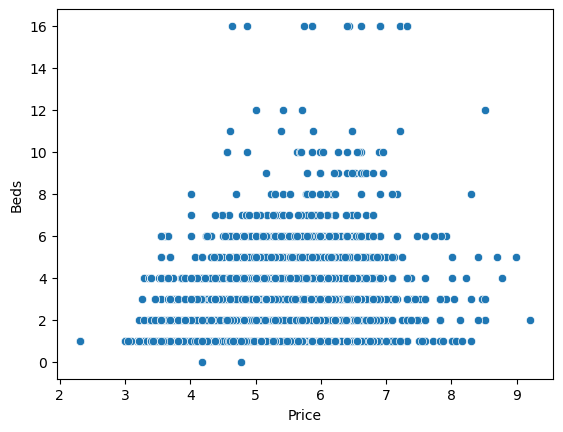

In [ ]:
# Q2.5
import seaborn as sns

sns.scatterplot(x=price_log, y="Beds", data=df)
# The more beds there are, the higher the price, but there is more variance at a lower number of beds.

In [22]:
df.loc[:,["Beds","Price"]].groupby("Beds").describe()

# Prices go up as beds go up. Also standard deviation also increases as bed number increases.

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

<Axes: xlabel='Price', ylabel='Beds'>

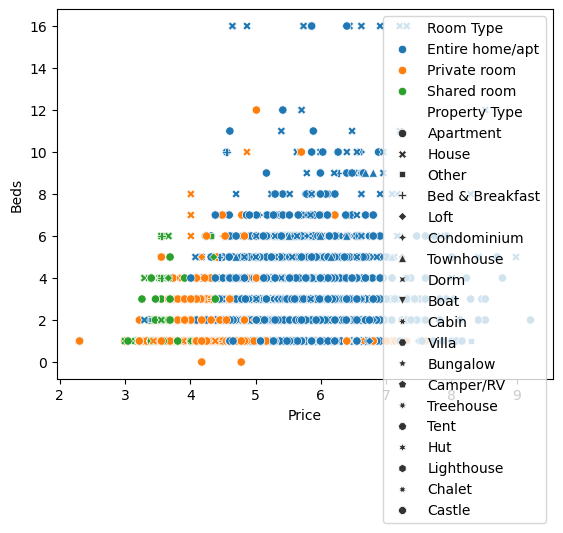

In [25]:
# Q2.6
sns.scatterplot(data=df, x=price_log, y="Beds", hue="Room Type", style="Property Type")

# The entire homes are more expensive.
# Houses and apartments seem to be the most common options.

In [ ]:
df.loc[:,["Room Type", "Price"]].groupby("Room Type").describe()
# Entire home is most expensive, but also has the greatest standard deviation. 

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [34]:
df.loc[:,["Property Type", "Price"]].groupby("Property Type").describe()
# Other is the most expensive property type, but with the highest standard deviation as well.
# For both room and property type, median appears to a better measure of central tendency, as the data swings too mcuh
# affecting the mean, especially on the higher end.

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [45]:
# 3.1
df2 = pd.read_csv('/Users/edwardzhang/Documents/college/4th year sem 1/Machine Learning/eda_assignment/data/drilling_rigs.csv')
df2.info()
# 10 variables, 623 observations
df2.head()
# Month is not in a standard date format.
# The other variables are fine, but some are missing a lot of data.
# The data that is missing shoudl be cleaned to be np.nan. 
# The month variable can be converted to a date format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [49]:
# Q3.2
df2['Time'] = pd.to_datetime(df2['Month'], format='mixed')
df2.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),Time
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549,1973-01-01
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677,1973-02-01
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805,1973-03-01
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898,1973-04-01
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991,1973-05-01


<Axes: xlabel='Time', ylabel='Active Well Service Rig Count (Number of Rigs)'>

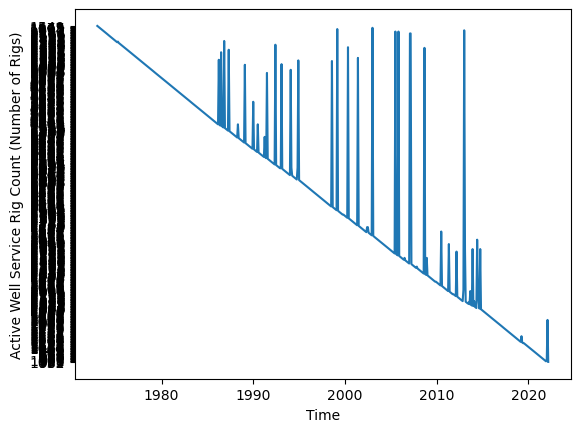

In [53]:
# Q3.3
df2["Active Well Service Rig Count (Number of Rigs)"] = df2["Active Well Service Rig Count (Number of Rigs)"].replace("Not Available", np.nan)
sns.lineplot(data = df2, x = "Time", y = "Active Well Service Rig Count (Number of Rigs)")
# The number decreases over time. But also, at some points, the data peaks suddenly before falling again.

<Axes: xlabel='Time'>

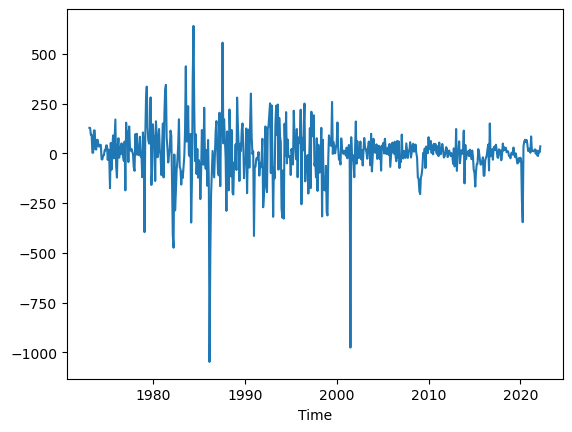

In [ ]:
# Q3.4
df2["Active Well Service Rig Count (Number of Rigs)"]= pd.to_numeric(df2["Active Well Service Rig Count (Number of Rigs)"], errors='coerce')
y = df2["Active Well Service Rig Count (Number of Rigs)"].to_numpy()
t = len(y)

diff = y[1:]-y[:(t-1)]

sns.lineplot(x=df2['Time'][1:],y=diff)

# The difference plot show that at many points there are large spikes both positive and negative, but over time,
# the spikes decrease in magnitude.


<Axes: xlabel='Active Well Service Rig Count (Number of Rigs)', ylabel='Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'>

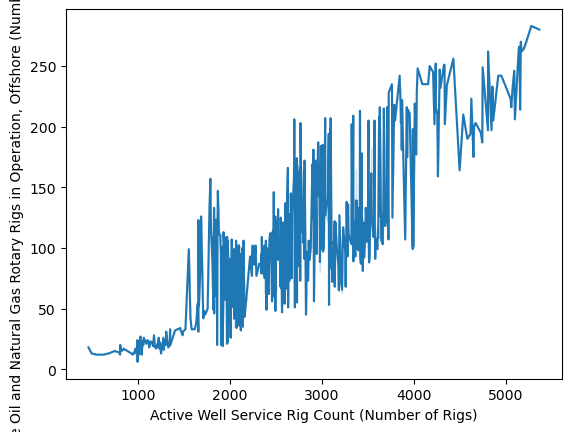

In [79]:
# Q3.5
df3 = df2.melt(id_vars=["Active Well Service Rig Count (Number of Rigs)", "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"])
sns.lineplot(data=df3,x= "Active Well Service Rig Count (Number of Rigs)",y="Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)")

In [80]:
# End